https://www.earthdatascience.org/tutorials/visualize-digital-elevation-model-contours-matplotlib/

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation 

In [2]:
filename = "\EXPLORE_temporary_datashare\\EXPLORE-DC-dataset-examples\\LROC\\NAC\\M101949648LE_lev2.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array=[]
data_array = gdal_data.ReadAsArray().astype(np.float)
# data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

C:\Users\salee\AppData\Local\Temp/ipykernel_10536/4008782493.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_array = gdal_data.ReadAsArray().astype(np.float)


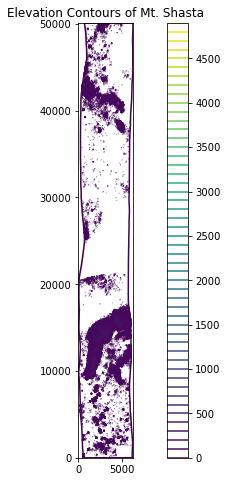

In [3]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 100)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

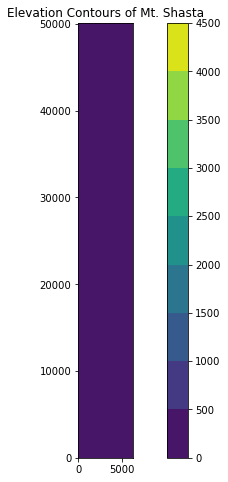

In [12]:
#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contourf(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 500)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()